<a href="https://colab.research.google.com/github/Ouardavalue/EDP/blob/master/EDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots

In [0]:

#Electric cars chargings Points optimal location
#Domain Energy & Environment

#Identify the optimal points where to install the electric vehicule cchargings points
#EDP is a company that leads the energy sector. in spain, EDP is present in generation, distribution and commercialization of electricity , gas and services.

#the goal is to identify the optimal points where to install the electric vehicule chargings. EDP is now expandings its public charging infrastructure and it is of high importance where to place the nex chargings points.
#the decision will be based on the location of existing points, the trafic information and matriculation of existing cars plus projection of electric cars in the future.

#need spanish traffic information
#EDP own public infrastructure data

#the objective of this challenge is to develop a predictive Model which based on the inputs included in the datasets generates the charging points optimal location. the algorithm should be able of deciding where EDP should install its charging points.
#the best is to have a dashbord that shows in the best possible way the result of the predictive model.

#File loading

In [0]:
# code qui permet en cas de changement de chemin du repertoire root, pour eviter de retaper tout le chemin
#fonction utilisée: concatenantion
data_dir = './gdrive/My Drive/edp_data/'
mat_file = data_dir + 'matricules.xlsx'
points_file = data_dir + 'PuntosRecarga.xlsx'
provincia_file = data_dir + 'provincia_listado.xlsx'
impagos_file = data_dir + 'impagos.xlsx'

In [0]:
#matricules.xlxs
mat_cols = ['Categoria_veh_elect', 'Año', 'Mercado', 'Marca', 'Modelo', 'Provincia', 'Canal']
df_matricules = pd.read_excel(mat_file,
                              usecols=mat_cols)

"Canal" : Particular/Empressa/Alquilador

In [0]:
#provincia_listado.xlsx
prov_cols = ['Autonomia', 'Superficie', 'PROVINCIA']
df_provincia = pd.read_excel(provincia_file,
                             usecols=prov_cols)

In [0]:
#impagos.xlsx
impagos_cols = ['CONSUMO_ELECTRICO_ANUAL', 'PROVINCIA', 'TIPO_CLIENTE']
df_impagos = pd.read_excel(impagos_file,
                           usecols=impagos_cols)

(array([526.,   0.,   0., 434.,   0.,   0.,  86.,   0.,   0.,   5.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

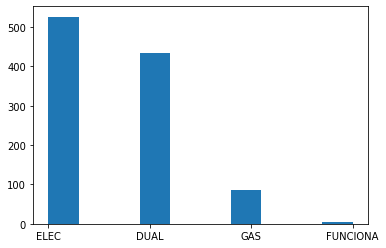

In [0]:
plt.hist(df_impagos.TIPO_CLIENTE)

In [0]:
#PuntosRecarga.xlsx
df_points = pd.read_excel(points_file)

In [0]:
df_impagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CONSUMO_ELECTRICO_ANUAL  1051 non-null   float64
 1   PROVINCIA                1051 non-null   object 
 2   TIPO_CLIENTE             1051 non-null   object 
dtypes: float64(1), object(2)
memory usage: 24.8+ KB


In [0]:
df_matricules.info()
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Categoria_veh_elect  130 non-null    object
 1   Año                  130 non-null    int64 
 2   Mercado              130 non-null    object
 3   Marca                130 non-null    object
 4   Modelo               130 non-null    object
 5   Provincia            130 non-null    object
 6   Canal                130 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.2+ KB


In [0]:
df_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PROVINCIA   52 non-null     object 
 1   Superficie  52 non-null     float64
 2   Autonomia   52 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [0]:
df_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   grupo               153 non-null    object 
 1   organizacion        153 non-null    object 
 2   SuperCPO            156 non-null    object 
 3   GrupoCargadoresCPO  156 non-null    object 
 4   region              156 non-null    object 
 5   zona                156 non-null    object 
 6   ubicacion           156 non-null    object 
 7   latitud             156 non-null    float64
 8   longitud            156 non-null    float64
 9   posteRecarga        156 non-null    object 
 10  toma                154 non-null    object 
dtypes: float64(2), object(9)
memory usage: 13.5+ KB


# Data Preprocessing

In [0]:
def match_region_name(reg_src, list_reg):
  """
  Matches composite names which appears in a different order
  e.g. 'Principade de Asturias' and 'Asturias Principado de'
  """
  l_src = reg_src.split()

  if len(l_src) == 1:
    return reg_src

  l = list(map(str.split, list_reg))
  l = [i for i in l if len(i) > 1]
  return ' '.join(next((s for s in l if set(l_src) == set(s)), reg_src.split()))

def replace_whole_str(sub, l):
  return next((s for s in l if sub in s), sub)

In [0]:
#Normalisation des regions du fichier points
df_points['region'] = df_points['region'].str.lower()
df_points['region'] = df_points['region'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_points['region'].unique()

array(['principado de asturias', 'pais vasco', 'comunidad valenciana',
       'cantabria', 'castilla y leon', 'region de murcia', 'andalucia'],
      dtype=object)

In [0]:
#Normalisation des noms de provinces du fichier provincia_listado
df_provincia['PROVINCIA'] = df_provincia['PROVINCIA'].str.lower()
df_provincia['PROVINCIA'] = df_provincia['PROVINCIA'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_provincia['PROVINCIA'] = df_provincia['PROVINCIA'].str.replace('\(|\)', '', regex=True)

df_provincia['Autonomia'] = df_provincia['Autonomia'].str.lower()
df_provincia['Autonomia'] = df_provincia['Autonomia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

df_provincia['Autonomia'] = df_provincia['Autonomia'].str.replace('\(|\)', '', regex=True)
df_provincia['Autonomia'] = df_provincia['Autonomia'].apply(lambda x : match_region_name(x, df_points['region'].unique()))
df_provincia['Autonomia'].unique()

array(['pais vasco', 'castilla-la mancha', 'comunidad valenciana',
       'andalucia', 'castilla y leon', 'extremadura', 'balears illes',
       'cataluna', 'galicia', 'aragon', 'rioja la', 'madrid comunidad de',
       'region de murcia', 'navarra comunidad foral de',
       'principado de asturias', 'canarias', 'cantabria',
       'ceuta ciudad de', 'melilla ciudad de'], dtype=object)

In [0]:
#Impagos normalisation
df_impagos['PROVINCIA'] = df_impagos['PROVINCIA'].str.lower()
df_impagos['PROVINCIA'] = df_impagos['PROVINCIA'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
#df_impagos['PROVINCIA'] = df_impagos['PROVINCIA'].apply(lambda x : x.replace(' / ', '/'))
df_impagos['PROVINCIA'] = df_impagos['PROVINCIA'].str.replace(' / ', '/')
df_impagos['PROVINCIA'] = df_impagos['PROVINCIA'].apply(lambda x : replace_whole_str(x, df_provincia['PROVINCIA'].unique()))
df_impagos['PROVINCIA'] = df_impagos['PROVINCIA'].apply(lambda x : match_region_name(x, df_provincia['PROVINCIA'].unique()))
df_impagos['PROVINCIA'].unique()

array(['asturias', 'leon', 'navarra', 'baleares', 'madrid', 'toledo',
       'alicante/alacant', 'zaragoza', 'salamanca', 'valladolid',
       'cantabria', 'valencia/valencia', 'araba/alava', 'murcia',
       'gerona', 'bizkaia', 'barcelona', 'badajoz', 'gipuzkoa', 'jaen',
       'palencia', 'rioja la', 'lerida', 'sevilla', 'albacete', 'granada',
       'huelva', 'cordoba', 'guadalajara'], dtype=object)

In [0]:
df_provincia['PROVINCIA'].unique()

array(['araba/alava', 'albacete', 'alicante/alacant', 'almeria', 'avila',
       'badajoz', 'balears/baleares illes', 'barcelona', 'burgos',
       'caceres', 'cadiz', 'castellon/castello', 'ciudad real', 'cordoba',
       'coruna la', 'cuenca', 'girona/gerona', 'granada', 'guadalajara',
       'gipuzkoa/guipuzcoa', 'huelva', 'huesca', 'jaen', 'leon',
       'lleida/lerida', 'rioja la', 'lugo', 'madrid', 'malaga', 'murcia',
       'navarra', 'ourense/orense', 'asturias', 'palencia', 'palmas las',
       'pontevedra', 'salamanca', 'santa cruz de tenerife', 'cantabria',
       'segovia', 'sevilla', 'soria', 'tarragona', 'teruel', 'toledo',
       'valencia/valencia', 'valladolid', 'bizkaia/vizcaya', 'zamora',
       'zaragoza', 'ceuta', 'melilla'], dtype=object)

In [0]:
#Normalisation des noms des provinces du fichier matricules
df_matricules['Provincia'] = df_matricules['Provincia'].apply(lambda x : x.strip().lower())
df_matricules['Provincia'] = df_matricules['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_matricules['Provincia'] = df_matricules['Provincia'].str.replace('\(|\)', '', regex=True)
df_matricules['Provincia'] = df_matricules['Provincia'].apply(lambda x : replace_whole_str(x, df_provincia['PROVINCIA'].unique()))
df_matricules['Provincia'].unique()

array(['araba/alava', 'sta. cruz tenerife', 'murcia', 'valladolid',
       'huelva', 'alicante/alacant', 'castellon/castello', 'ciudad real',
       'coruna la', 'gerona', 'guadalajara', 'huesca', 'madrid',
       'navarra', 'palmas las', 'pontevedra', 'tarragona', 'zaragoza',
       'albacete', 'almeria', 'badajoz', 'burgos', 'cantabria', 'cordoba',
       'guipuzcoa', 'sevilla', 'barcelona', 'asturias', 'baleares',
       'leon', 'salamanca', 'toledo', 'valencia/valencia', 'rioja la',
       'malaga', 'vizcaya', 'granada', 'cadiz', 'lugo', 'jaen', 'lerida',
       'orense'], dtype=object)

In [0]:
#Sanity check
try:
  assert set(df_matricules['Provincia'].unique()).issubset(set(df_provincia['PROVINCIA'].unique()))
  print('Provincia names from matricules.xlsx MATCH names from provincia_listado.xlsx')
except AssertionError:
  print('Provincia names from matricules.xlsx DO NOT MATCH names from provincia_listado.xlsx')

print('#'*50)

try:
  assert(set(df_points['region'].unique()).issubset(set(df_provincia['Autonomia'].unique())))
  print('Autonomia names from PuntosRecarga MATCH names from provincia_listado.xlsx')
except AssertionError:
  print('Autonomia names from PuntosRecarga.xlsx DO NOT MATCH names from provincia_listado.xlsx')

print('#'*50)

try:
  assert(set(df_impagos['PROVINCIA'].unique()).issubset(set(df_provincia['PROVINCIA'].unique())))
  print('Provincia names from impagos.xlsx MATCH names from  provincia_listado.xlsx')
except AssertionError:
  print('Provincia names from impagos.xlsx DO NOT MATCH names from  provincia_listado.xlsx')

Provincia names from matricules.xlsx DO NOT MATCH names from provincia_listado.xlsx
##################################################
Autonomia names from PuntosRecarga MATCH names from provincia_listado.xlsx
##################################################
Provincia names from impagos.xlsx DO NOT MATCH names from  provincia_listado.xlsx


In [0]:
# Champ  à enlever
# Get not matching elements
print(set(df_matricules['Provincia'].unique()).difference(set(df_provincia['PROVINCIA'].unique())))


{'baleares', 'gerona', 'vizcaya', 'guipuzcoa', 'sta. cruz tenerife', 'lerida', 'orense'}


False

In [0]:
#Join matricules w/ provincia to add Autonomia
df_merged_w_provincia= df_matricules.merge(df_provincia,
                                left_on='Provincia',
                                right_on='PROVINCIA')

In [0]:
df_merged_w_provincia.head()

,Categoria_veh_elect,Año,Mercado,Marca,Modelo,Provincia,Canal,PROVINCIA,Superficie,Autonomia
0,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco
1,BEV,2019,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Empresa,araba/alava,3042.44,pais vasco
2,PHEV,2019,Automoviles,VOLKSWAGEN,GOLF 1.4 GTE,araba/alava,Empresa,araba/alava,3042.44,pais vasco
3,BEV,2018,Automoviles,VOLKSWAGEN,E-UP! 3P,murcia,Particular,murcia,11313.88,region de murcia
4,BEV,2019,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,murcia,Empresa,murcia,11313.88,region de murcia


In [0]:
df_merged_w_provincia.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Categoria_veh_elect  108 non-null    object 
 1   Año                  108 non-null    int64  
 2   Mercado              108 non-null    object 
 3   Marca                108 non-null    object 
 4   Modelo               108 non-null    object 
 5   Provincia            108 non-null    object 
 6   Canal                108 non-null    object 
 7   PROVINCIA            108 non-null    object 
 8   Superficie           108 non-null    float64
 9   Autonomia            108 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 9.3+ KB


In [0]:
#Join points w/ matricules
df_merged_w_points = df_merged_w_provincia.merge(df_points,
                                                 how='left',
                                                 left_on='Autonomia',
                                                 right_on='region')

In [0]:
#Df n'ayant pas de bornes dans la même regions que les voitures
#df_merged_w_points[df_merged_w_points['zona'].isnull()].info() # 56 entries
df_merged_w_points[df_merged_w_points['zona'].isnull()].head()

,Categoria_veh_elect,Año,Mercado,Marca,Modelo,Provincia,Canal,PROVINCIA,Superficie,Autonomia,grupo,organizacion,SuperCPO,GrupoCargadoresCPO,region,zona,ubicacion,latitud,longitud,posteRecarga,toma
87,BEV,2019,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,ciudad real,Empresa,ciudad real,19662.78,castilla-la mancha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,BEV,2019,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,coruna la,Particular,coruna la,7910.76,galicia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,PHEV,2018,Automoviles,VOLKSWAGEN,GOLF 1.4 GTE,coruna la,Empresa,coruna la,7910.76,galicia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,PHEV,2019,Automoviles,VOLKSWAGEN,PASSAT 1.4 GTE 4P (B6),coruna la,Empresa,coruna la,7910.76,galicia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,BEV,2019,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,coruna la,Empresa,coruna la,7910.76,galicia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Df bornes présentes dans la même région que les voitures
#df_merged_w_points[df_merged_w_points['zona'].notnull()].info() # 868 entries
df_merged_w_points[df_merged_w_points['zona'].notnull()].head()

,Categoria_veh_elect,Año,Mercado,Marca,Modelo,Provincia,Canal,PROVINCIA,Superficie,Autonomia,grupo,organizacion,SuperCPO,GrupoCargadoresCPO,region,zona,ubicacion,latitud,longitud,posteRecarga,toma
0,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco,Edp Moveon,EDP,EDP moveon,EDP Moveon,pais vasco,Vitoria,País Vasco,42.860120,-2.703290,Vitorialanda,CCS Combo 2 Plug (Cable Attached)
1,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco,Edp Moveon,EDP,EDP moveon,EDP Moveon,pais vasco,Vitoria,País Vasco,42.860120,-2.703290,Vitorialanda,CHAdeMO
2,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco,Edp Moveon,EDP,EDP moveon,EDP Moveon,pais vasco,Vitoria,País Vasco,42.860120,-2.703290,Vitorialanda,Type 2 Connector (Cable Attached)
3,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco,EDP Mantenimiento,Mantenimiento,EDP moveon,EDP Moveon,pais vasco,Bergara,País Vasco,43.107969,-2.406641,Avia - Bergara,CHAdeMO
4,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco,ISASTUR,Mantenimiento,EDP moveon,EDP Moveon,pais vasco,Murguía,País Vasco,42.961774,-2.827486,Murguía,CHAdeMO


#Exploratory Data Analysis

##Data matricules/points

In [0]:
#Nombre de bornes par region
df_point_per_region = df_points['region'].value_counts().rename_axis('region').reset_index(name='count_point')
df_point_per_region

,region,count_point
0,principado de asturias,124
1,comunidad valenciana,10
2,pais vasco,7
3,cantabria,5
4,andalucia,4
5,castilla y leon,4
6,region de murcia,2


In [0]:
#Nb matricule par region
df_veh_per_region = df_merged_w_provincia.groupby('Autonomia').agg({'Categoria_veh_elect': 'count'}).reset_index()
df_veh_per_region

,Autonomia,Categoria_veh_elect
0,andalucia,21
1,aragon,5
2,canarias,6
3,cantabria,1
4,castilla y leon,7
5,castilla-la mancha,6
6,cataluna,13
7,comunidad valenciana,10
8,extremadura,1
9,galicia,8


In [0]:
#Par region, nombre de bornes et voiture (Left Join)
df_merged = df_provincia.merge(df_point_per_region, how='left', left_on='Autonomia', right_on='region')\
                        .merge(df_veh_per_region, how='left', on='Autonomia')
df_merged = df_merged[['Autonomia', 'count_point', 'Categoria_veh_elect']].drop_duplicates().fillna(0)
df_merged.rename(columns={'Categoria_veh_elect': 'count_veh'}, inplace=True)
df_merged

,Autonomia,count_point,count_veh
0,pais vasco,7.0,3.0
1,castilla-la mancha,0.0,6.0
2,comunidad valenciana,10.0,10.0
3,andalucia,4.0,21.0
4,castilla y leon,4.0,7.0
5,extremadura,0.0,1.0
6,balears illes,0.0,0.0
7,cataluna,0.0,13.0
14,galicia,0.0,8.0
21,aragon,0.0,5.0


In [0]:
x = df_merged['Autonomia'].values.tolist()
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=['Number of vehicle per autonomia', 'Number of points per autonomia'])

#Number of vehicle per autonomia
fig.add_trace(go.Bar(x=x, y=df_merged['count_veh'].values.tolist(), text=df_merged['count_veh'].values.tolist(), textposition='outside', name='nb_vehicle'),
              row=1,
              col=1)


#Number of points per autonomia
fig.add_trace(go.Bar(x=x, y=df_merged['count_point'].values.tolist(), text=df_merged['count_point'].values.tolist(), textposition='outside', name='nb_poins'),
              row=2,
              col=1)

fig.update_layout(height=900, width=1300)
fig.show()

The number of vehicle is low and contains only Volkswagen cars for some reason. </br>
This file must be incomplete.

In [0]:
autonomias = df_merged['Autonomia'].unique()

fig = go.Figure(data=[
    go.Bar(name='nb_points', x=autonomias, y=df_merged['count_point']),
    go.Bar(name='nb_vehicles', x=autonomias, y=df_merged['count_veh'])
])
# Change the bar mode
fig.update_layout(title='Number of points and vehicle per autonomia', barmode='group')
fig.show()

We can see that some cities have electrical vehicles but don't have charging points. <br/>
Notice that Asturias has too many charging points (120+ points for 10- vehicles)

## Data Impagos

In [0]:
s_counts = df_impagos['PROVINCIA'].value_counts()
data = {'PROVINCIA': s_counts.index.tolist(), 
        'count_veh': s_counts.values.tolist()}
df_counts = pd.DataFrame(data, columns=['PROVINCIA', 'count_veh'])

NameError: ignored

In [0]:
y = df_counts['count_veh'].values.tolist()

fig = go.Figure(go.Bar(x=df_counts['PROVINCIA'].values.tolist(),
                       y=y,
                       text=y,
                       textposition='outside'))

fig.update_layout(title='Number of vehicle per autonomia according impagos file')
fig.show()

This barplot show electric/hybrid car users. Most of the customers are from Asturias, which is expected. <br/>
As shown above, Asturias has most of the charging points but in this file, we have more users coming from there. <br/>

In [0]:
df_impagos = df_impagos[df_impagos['TIPO_CLIENTE'].isin(['ELEC', 'DUAL'])]
#df_impagos_consumo = df_impagos.groupby('PROVINCIA').agg({'CONSUMO_ELECTRICO_ANUAL': 'sum'}).reset_index()
df_impagos = df_impagos.merge(df_provincia, on='PROVINCIA')
df_impagos = df_impagos.groupby('Autonomia').agg({'CONSUMO_ELECTRICO_ANUAL': 'sum'}).reset_index()
df_impagos.sort_values('CONSUMO_ELECTRICO_ANUAL', inplace=True)

In [0]:
#Plot electrical consumption per autonomia
y = df_impagos_consumo['CONSUMO_ELECTRICO_ANUAL'].values.tolist()

fig = go.Figure(go.Bar(x=df_impagos_consumo['Autonomia'].values.tolist(),
                       y=y,
                       text=y,
                       textposition='outside',
                       texttemplate='%{y:2.2f}'))

fig.update_layout(title='Electrical consumption per autonomia')
fig.show()

# Premier jet

In [0]:
#One-Hot Encoding
df_merged_dummy = pd.concat([pd.get_dummies(df_merged['Autonomia']), df_merged[['count_point', 'Categoria_veh_elect']]], axis=1)
df_merged_dummy

KeyError: ignored

In [0]:
#Entrainement d'un modele KMeans
from sklearn.cluster import KMeans

n_clusters = 3
X = df_merged_dummy.values

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#Check des corrdonées des centroides
kmeans.cluster_centers_

array([[6.93889390e-18, 7.14285714e-02, 7.14285714e-02, 7.14285714e-02,
        7.14285714e-02, 7.14285714e-02, 7.14285714e-02, 6.93889390e-18,
        7.14285714e-02, 6.93889390e-18, 7.14285714e-02, 7.14285714e-02,
        6.93889390e-18, 7.14285714e-02, 7.14285714e-02, 7.14285714e-02,
        6.93889390e-18, 7.14285714e-02, 7.14285714e-02, 1.28571429e+00,
        3.14285714e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.24000000e+02,
        5.00000000e+00],
       [2.50000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
        0.00000000e+00, 2.50000000e-01, 0.00000000e+00, 0.00000000e+00,
        2.5000

In [0]:
#Dimensionality reduction
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

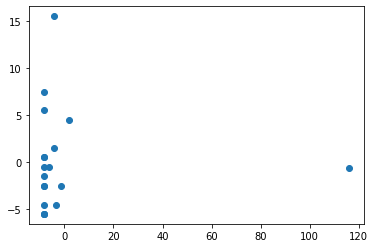

In [0]:
#Points en 
import matplotlib.pyplot as plt

plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

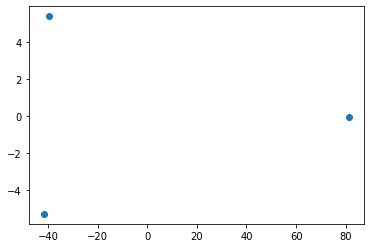

In [0]:
n_components = 2
pca_center = PCA(n_components=n_components)
center_reduced = pca_center.fit_transform(kmeans.cluster_centers_)
plt.scatter(center_reduced[:, 0], center_reduced[:, 1])